<a target="_blank" href="https://colab.research.google.com/github/fpallottini/articles/blob/main/Statistical%20Tests%20Seismic/notebooks/F3_maxmag_classes.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Load the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
from scipy.stats import shapiro, norm, probplot
from scipy.stats import kruskal
from scipy.stats import anderson
from scipy.stats import levene

# Load the Max Magnitude Map and Class map as dataframes

Insert columns names

In [2]:
df1 = pd.read_csv("../data/Top_FSST1_3_classes",
                  sep=' ',
                  header=20,
                  names=["x", "y", "class", "column", "row"])
df2 = pd.read_csv("../data/Top_FSST1_3_classes_maxmag",
                  sep=' ',
                  header=20,
                  names=["x", "y", "maxmag", "column", "row"])

# Structure investigation

First five cases

In [3]:
df1.head()

,x,y,class,column,row
0,605907.658372,6.073659e+06,2.0,4,5
1,605932.648963,6.073659e+06,2.0,5,5
2,605957.639554,6.073660e+06,2.0,6,5
3,605982.630144,6.073661e+06,2.0,7,5
4,606007.620735,6.073661e+06,2.0,8,5


Last five cases

In [4]:
df1.tail()

,x,y,class,column,row
591998,628974.032587,6.090409e+06,1.0,945,649
591999,628999.023178,6.090410e+06,1.0,946,649
592000,629024.013769,6.090411e+06,1.0,947,649
592001,629049.004359,6.090411e+06,1.0,948,649
592002,629073.994950,6.090412e+06,1.0,949,649


In [5]:
df1.index.names

FrozenList([None])

Print the dimensions of the DataFrame

In [6]:
print(df1.shape)

(592003, 5)


# Data Info

Count how many times each data type is present in the dataset

In [7]:
pd.value_counts(df1.dtypes)

float64    3
int64      2
Name: count, dtype: int64

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 592003 entries, 0 to 592002
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   x       592003 non-null  float64
 1   y       592003 non-null  float64
 2   class   592003 non-null  float64
 3   column  592003 non-null  int64  
 4   row     592003 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 22.6 MB


Data Types

In [9]:
df1.dtypes

x         float64
y         float64
class     float64
column      int64
row         int64
dtype: object

In [10]:
df1.describe()

,x,y,class,column,row
count,592003.000000,5.920030e+05,592003.000000,592003.000000,592003.000000
mean,617704.363491,6.081805e+06,2.136018,484.780403,317.543198
std,6791.380662,4.544280e+03,0.685991,271.987751,181.271594
min,605467.816142,6.073659e+06,1.000000,3.000000,5.000000
25%,611875.868755,6.077881e+06,2.000000,251.000000,161.000000
50%,617831.904848,6.081787e+06,2.000000,490.000000,317.000000
75%,623566.212557,6.085692e+06,3.000000,720.000000,473.000000
max,629523.766761,6.090412e+06,3.000000,949.000000,649.000000


In [11]:
df2.describe()

,x,y,maxmag,column,row
count,592003.000000,5.920030e+05,592003.000000,592003.000000,592003.000000
mean,617704.363491,6.081805e+06,4129.555901,484.780403,317.543198
std,6791.380662,4.544280e+03,1790.592939,271.987751,181.271594
min,605467.816142,6.073659e+06,0.000000,3.000000,5.000000
25%,611875.868755,6.077881e+06,2632.000000,251.000000,161.000000
50%,617831.904848,6.081787e+06,4223.000000,490.000000,317.000000
75%,623566.212557,6.085692e+06,5487.000000,720.000000,473.000000
max,629523.766761,6.090412e+06,16317.000000,949.000000,649.000000


In [12]:
merged_df = pd.concat(
    [df1[['x', 'y', 'class']], df2[['maxmag']], df1[['column', 'row']]],
    axis=1)

In [13]:
merged_df.head()

,x,y,class,maxmag,column,row
0,605907.658372,6.073659e+06,2.0,3847.0,4,5
1,605932.648963,6.073659e+06,2.0,3828.0,5,5
2,605957.639554,6.073660e+06,2.0,3590.0,6,5
3,605982.630144,6.073661e+06,2.0,3521.0,7,5
4,606007.620735,6.073661e+06,2.0,3290.0,8,5


In [14]:
merged_df.describe()

,x,y,class,maxmag,column,row
count,592003.000000,5.920030e+05,592003.000000,592003.000000,592003.000000,592003.000000
mean,617704.363491,6.081805e+06,2.136018,4129.555901,484.780403,317.543198
std,6791.380662,4.544280e+03,0.685991,1790.592939,271.987751,181.271594
min,605467.816142,6.073659e+06,1.000000,0.000000,3.000000,5.000000
25%,611875.868755,6.077881e+06,2.000000,2632.000000,251.000000,161.000000
50%,617831.904848,6.081787e+06,2.000000,4223.000000,490.000000,317.000000
75%,623566.212557,6.085692e+06,3.000000,5487.000000,720.000000,473.000000
max,629523.766761,6.090412e+06,3.000000,16317.000000,949.000000,649.000000


In [ ]:
merged_df.to_excel('merged.xlsx', index=False)

# Plot the data

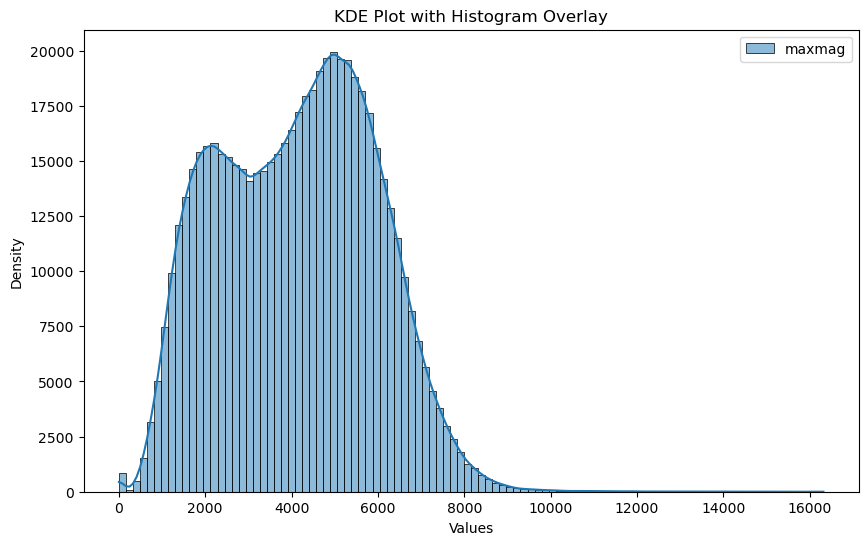

In [15]:
# KDE plot with histograms overlayed for classes
plt.figure(figsize=(10, 6))

for column in ['maxmag']:
    sns.histplot(merged_df[column], kde=True, label=column, bins=100)

plt.title('KDE Plot with Histogram Overlay')
plt.xlabel('Values')
plt.ylabel('Density')
plt.legend()
plt.show()

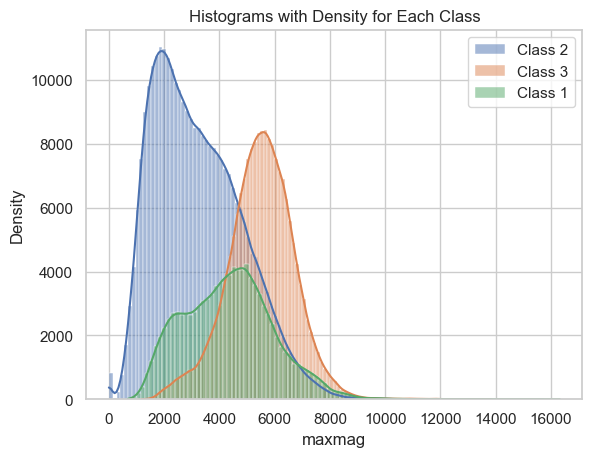

In [16]:
class_labels = merged_df['class'].unique()

# Set the style of seaborn
sns.set(style="whitegrid")

# Plot histograms for each class
for label in class_labels:
    class_data = merged_df[merged_df['class'] == label]

    # Plot histogram with density estimate for column 'maxmag'
    sns.histplot(class_data['maxmag'],
                 bins=100,
                 kde=True,
                 label=f'Class {int(label)}',
                 alpha=0.5)

# Add labels and legend
plt.xlabel('maxmag')
plt.ylabel('Density')
plt.title('Histograms with Density for Each Class')
plt.legend()

# Show the plot
plt.show()

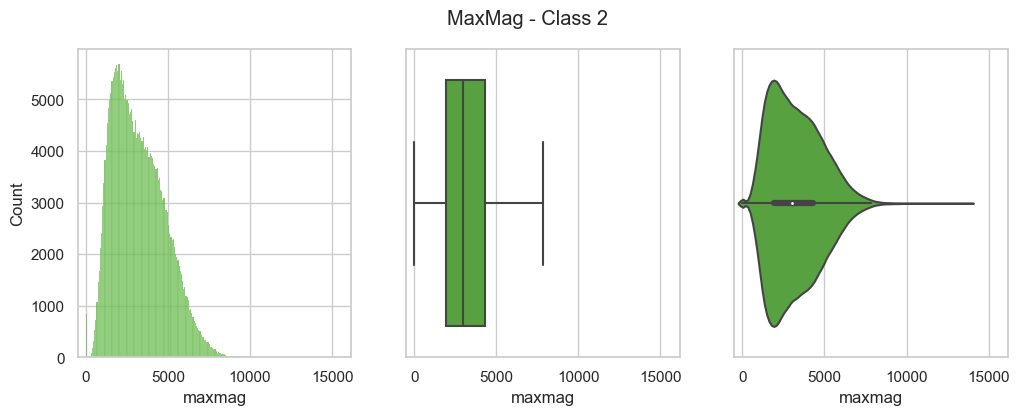

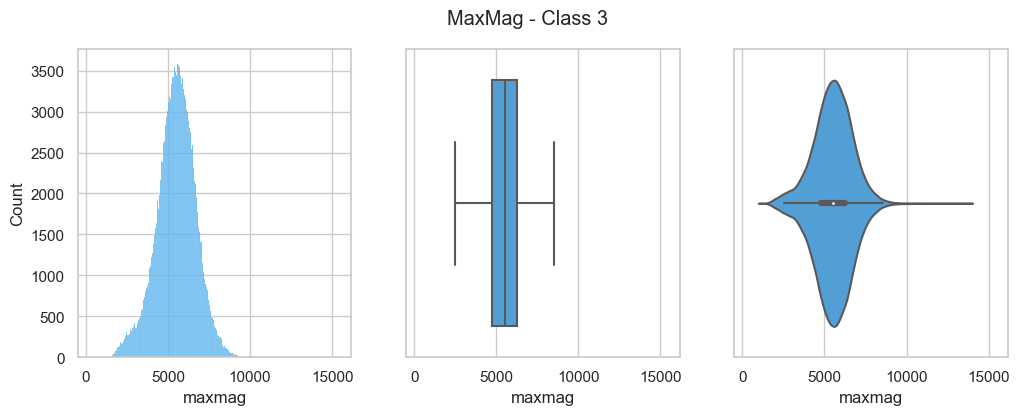

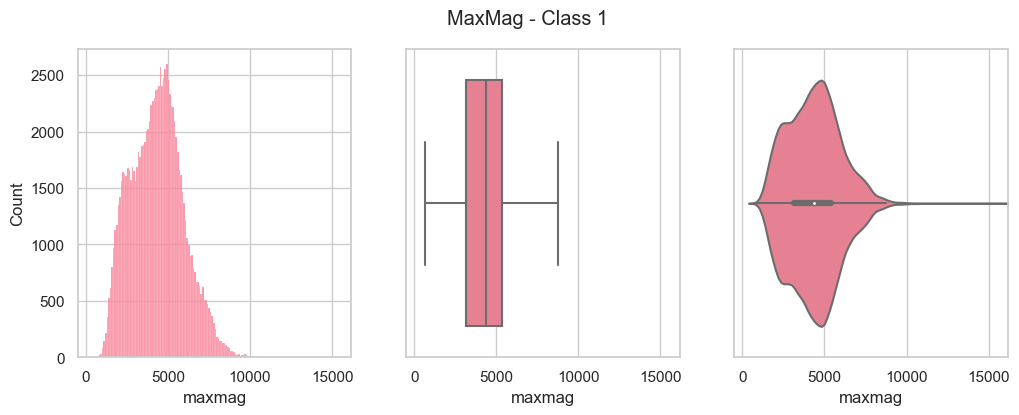

In [17]:
# Assuming merged_df is your DataFrame
class_labels = merged_df['class'].unique()

# Define a color palette with enough colors for all features
color_palette = sns.color_palette("husl", n_colors=len(class_labels))

maxmag_range = merged_df['maxmag'].quantile(
    0.9999999)  # Adjust the quantile if needed

# Loop over each class
for label in class_labels:
    class_data = merged_df[merged_df['class'] == label]

    plt.figure(figsize=(12, 4))
    plt.suptitle(f'MaxMag - Class {int(label)}')

    plt.subplot(1, 3, 1)
    sns.histplot(data=class_data.dropna(),
                 x='maxmag',
                 color=color_palette[int(label) - 1])
    plt.xlim(-500, maxmag_range)  # Set the x-axis limit

    plt.subplot(1, 3, 2)
    sns.boxplot(data=class_data,
                x='maxmag',
                color=color_palette[int(label) - 1],
                showfliers=False)
    plt.xlim(-500, maxmag_range)  # Set the x-axis limit

    plt.subplot(1, 3, 3)
    sns.violinplot(data=class_data,
                   x='maxmag',
                   color=color_palette[int(label) - 1])
    plt.xlim(-500, maxmag_range)  # Set the x-axis limit

    plt.show()

# Check the data normality

## Shapiro-Wilk Test

/Users/fpallottini/opt/anaconda3/envs/geoml/lib/python3.10/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Class 2 - Shapiro-Wilk Test: Statistic=0.9683141708374023, p-value=0.0
Conclusion: Reject the null hypothesis (Data does not appear to be normally distributed)


/Users/fpallottini/opt/anaconda3/envs/geoml/lib/python3.10/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Class 3 - Shapiro-Wilk Test: Statistic=0.991995096206665, p-value=0.0
Conclusion: Reject the null hypothesis (Data does not appear to be normally distributed)


/Users/fpallottini/opt/anaconda3/envs/geoml/lib/python3.10/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Class 1 - Shapiro-Wilk Test: Statistic=0.987729012966156, p-value=0.0
Conclusion: Reject the null hypothesis (Data does not appear to be normally distributed)


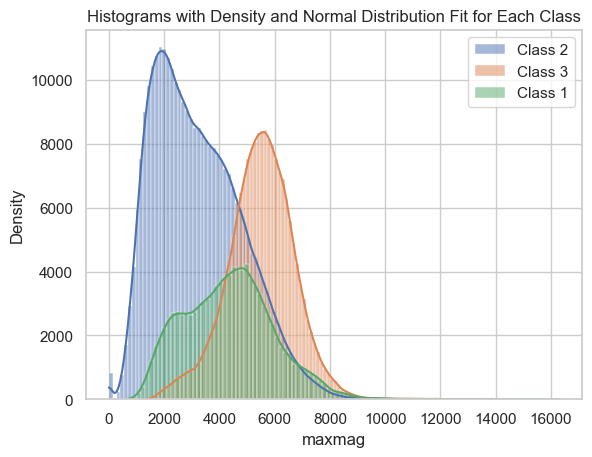

In [18]:
# Creating the labels from the DataFrame
class_labels = merged_df['class'].unique()

# Set the style of seaborn
sns.set(style="whitegrid")

# Plot histograms for each class
for label in class_labels:
    class_data = merged_df[merged_df['class'] == label]

    # Plot histogram with density estimate for column 'maxmag'
    sns.histplot(class_data['maxmag'],
                 bins=100,
                 kde=True,
                 label=f'Class {int(label)}',
                 alpha=0.5)

    # Perform Shapiro-Wilk normality test
    stat, p_value = shapiro(class_data['maxmag'])
    print(
        f"Class {int(label)} - Shapiro-Wilk Test: Statistic={stat}, p-value={p_value}"
    )

    # Hypothesis conclusion based on p-value
    alpha = 0.05
    if p_value > alpha:
        print(
            "Conclusion: Fail to reject the null hypothesis (Data appears to be normally distributed)"
        )
    else:
        print(
            "Conclusion: Reject the null hypothesis (Data does not appear to be normally distributed)"
        )

# Add labels and legend
plt.xlabel('maxmag')
plt.ylabel('Density')
plt.title('Histograms with Density and Normal Distribution Fit for Each Class')
plt.legend()

# Show the plot
plt.show()

As Shapiro-Wilk normality test is not appropriate beyond 5000 samples:

This warning message is generated by the `scipy.stats` module in Python and specifically relates to the p-value calculated during a statistical test. Here's a breakdown of the warning:

1. **Warning Source:**
   The warning originates from the file `_morestats.py` within the `scipy.stats` module. This module contains various statistical functions, including those for hypothesis testing.

2. **Warning Content:**
   The warning message itself is informing you that the p-value calculated during a statistical test may not be accurate when the sample size (N) is greater than 5000.

3. **Context:**
   In statistical hypothesis testing, the p-value is a measure of the evidence against a null hypothesis. A lower p-value typically suggests stronger evidence against the null hypothesis. However, with very large sample sizes, even small deviations from the null hypothesis may result in statistically significant p-values.

4. **Implication:**
   The warning is a cautionary note, indicating that you should interpret the p-value with caution when dealing with a sample size greater than 5000. It suggests that in such cases, the p-value may not provide a reliable assessment of the evidence against the null hypothesis.

5. **User Awareness:**
   Users are made aware of this potential issue to encourage them to consider the context of their analysis, especially when dealing with extremely large datasets.

In practice, when sample sizes are very large, small and possibly inconsequential deviations from the null hypothesis may lead to statistically significant p-values. It's advisable to complement p-values with other statistical measures and visualizations and to carefully consider the practical significance of the observed effects.

## Anderson-Darling test 
**The Anderson-Darling test is less affected by sample size and is designed to be more powerful for detecting departures from normality.**

Class 2 - Anderson-Darling Test: Statistic=2588.1965206112363
Critical Values: [0.576 0.656 0.787 0.918 1.092]
Conclusion: Reject the null hypothesis (Data does not appear to be normally distributed)
Class 3 - Anderson-Darling Test: Statistic=257.40656107169343
Critical Values: [0.576 0.656 0.787 0.918 1.092]
Conclusion: Reject the null hypothesis (Data does not appear to be normally distributed)
Class 1 - Anderson-Darling Test: Statistic=180.56757029388973
Critical Values: [0.576 0.656 0.787 0.918 1.092]
Conclusion: Reject the null hypothesis (Data does not appear to be normally distributed)


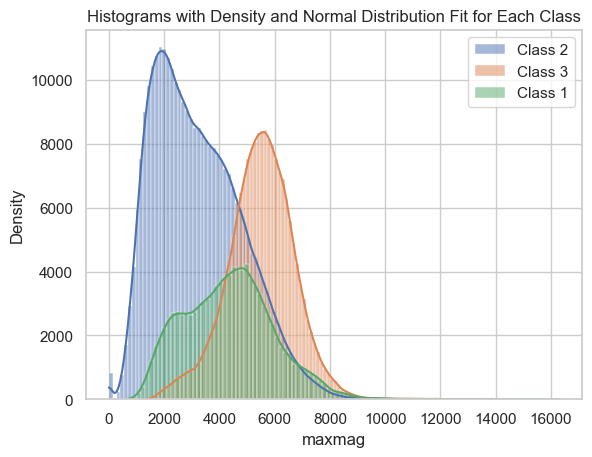

In [19]:
# Creating the labels from the DataFrame
class_labels = merged_df['class'].unique()

# Set the style of seaborn
sns.set(style="whitegrid")

# Plot histograms for each class
for label in class_labels:
    class_data = merged_df[merged_df['class'] == label]

    # Plot histogram with density estimate for column 'maxmag'
    sns.histplot(class_data['maxmag'],
                 bins=100,
                 kde=True,
                 label=f'Class {int(label)}',
                 alpha=0.5)

    # Perform Anderson-Darling normality test
    result = anderson(class_data['maxmag'])

    # Print the Anderson-Darling test statistic and critical values
    print(
        f"Class {int(label)} - Anderson-Darling Test: Statistic={result.statistic}"
    )
    print(f"Critical Values: {result.critical_values}")

    # Hypothesis conclusion based on the Anderson-Darling test
    alpha = 0.05
    if result.statistic > result.critical_values[
            2]:  # Using the critical value at 5% significance level
        print(
            "Conclusion: Reject the null hypothesis (Data does not appear to be normally distributed)"
        )
    else:
        print(
            "Conclusion: Fail to reject the null hypothesis (Data appears to be normally distributed)"
        )

# Add labels and legend
plt.xlabel('maxmag')
plt.ylabel('Density')
plt.title('Histograms with Density and Normal Distribution Fit for Each Class')
plt.legend()

# Show the plot
plt.show()

## Q-Q Plot

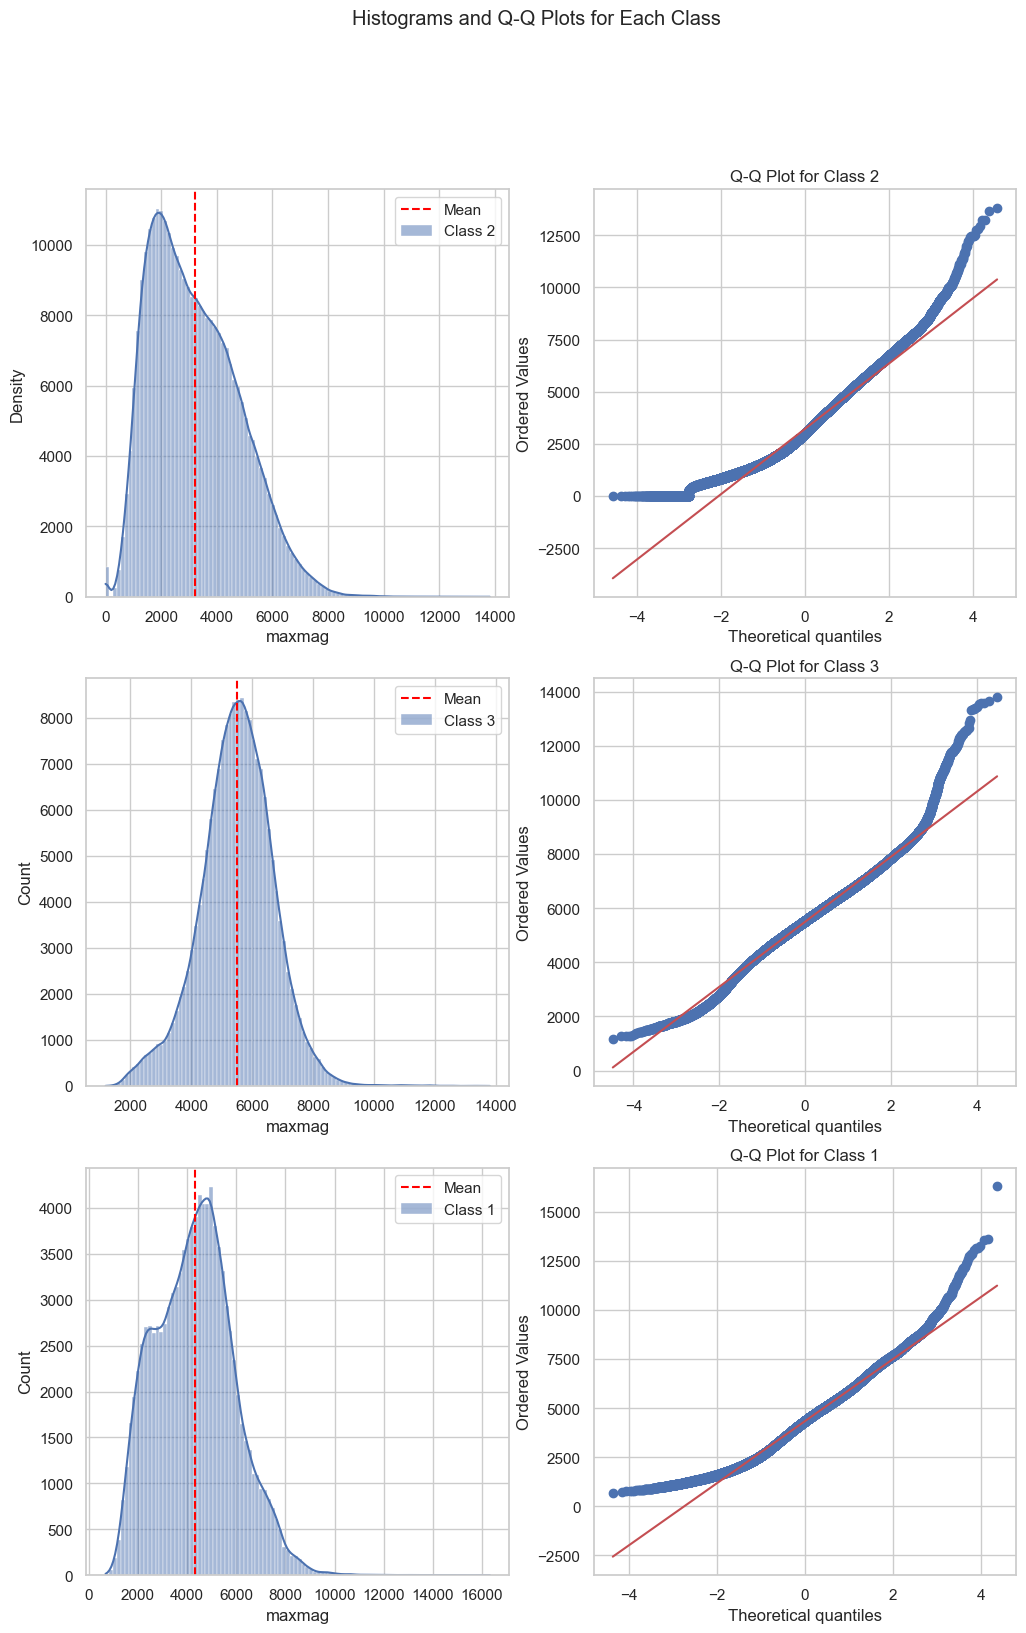

In [20]:
# Creating the labels from the DataFrame
class_labels = merged_df['class'].unique()

# Set the style of seaborn
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(len(class_labels),
                         2,
                         figsize=(12, 6 * len(class_labels)))
fig.suptitle('Histograms and Q-Q Plots for Each Class')

# Plot histograms and Q-Q plots for each class
for i, label in enumerate(class_labels):
    class_data = merged_df[merged_df['class'] == label]

    # Plot histogram with density estimate for column 'maxmag'
    sns.histplot(class_data['maxmag'],
                 bins=100,
                 kde=True,
                 label=f'Class {int(label)}',
                 alpha=0.5,
                 ax=axes[i, 0])
    axes[i, 0].axvline(x=class_data['maxmag'].mean(),
                       color='red',
                       linestyle='dashed',
                       label='Mean')
    axes[i, 0].legend()

    # Q-Q plot
    probplot(class_data['maxmag'], dist="norm", plot=axes[i, 1])
    axes[i, 1].set_title(f'Q-Q Plot for Class {int(label)}')

# Add labels and legend
axes[0, 0].set_xlabel('maxmag')
axes[0, 0].set_ylabel('Density')
axes[0, 0].legend()

# Show the plot
plt.show()


In [21]:
# Assuming merged_df is your DataFrame
class_labels = merged_df['class'].unique()

variance_test_results = []

# Loop over each class
for label in class_labels:
    class_data = merged_df[merged_df['class'] == label]

    # Perform Levene's test for homogeneity of variance
    test_statistic, p_value = levene(*[class_data['maxmag'].values for _, class_data in merged_df.groupby('class')])

    variance_test_results.append({'Class': int(label), 'Levene Test Statistic': test_statistic, 'P-value': p_value})

# Display the results
variance_test_df = pd.DataFrame(variance_test_results)
print(variance_test_df)

# Interpret the results
alpha = 0.05
for index, row in variance_test_df.iterrows():
    class_label = row['Class']
    test_statistic = row['Levene Test Statistic']
    p_value = row['P-value']

    print(f"\nHomogeneity of Variance Test - Class {class_label}")
    print(f"Levene Test Statistic: {test_statistic}")
    print(f"P-value: {p_value}")

    # Hypothesis conclusion based on p-value
    if p_value < alpha:
        print('Conclusion: Reject the null hypothesis (Variances are significantly different between classes)')
    else:
        print('Conclusion: Fail to reject the null hypothesis (No significant difference in variances between classes)')



   Class  Levene Test Statistic  P-value
0      2           10724.094629      0.0
1      3           10724.094629      0.0
2      1           10724.094629      0.0

Homogeneity of Variance Test - Class 2.0
Levene Test Statistic: 10724.094628818098
P-value: 0.0
Conclusion: Reject the null hypothesis (Variances are significantly different between classes)

Homogeneity of Variance Test - Class 3.0
Levene Test Statistic: 10724.094628818098
P-value: 0.0
Conclusion: Reject the null hypothesis (Variances are significantly different between classes)

Homogeneity of Variance Test - Class 1.0
Levene Test Statistic: 10724.094628818098
P-value: 0.0
Conclusion: Reject the null hypothesis (Variances are significantly different between classes)


# Visualize the data as maps

## Map of Max Magnitude

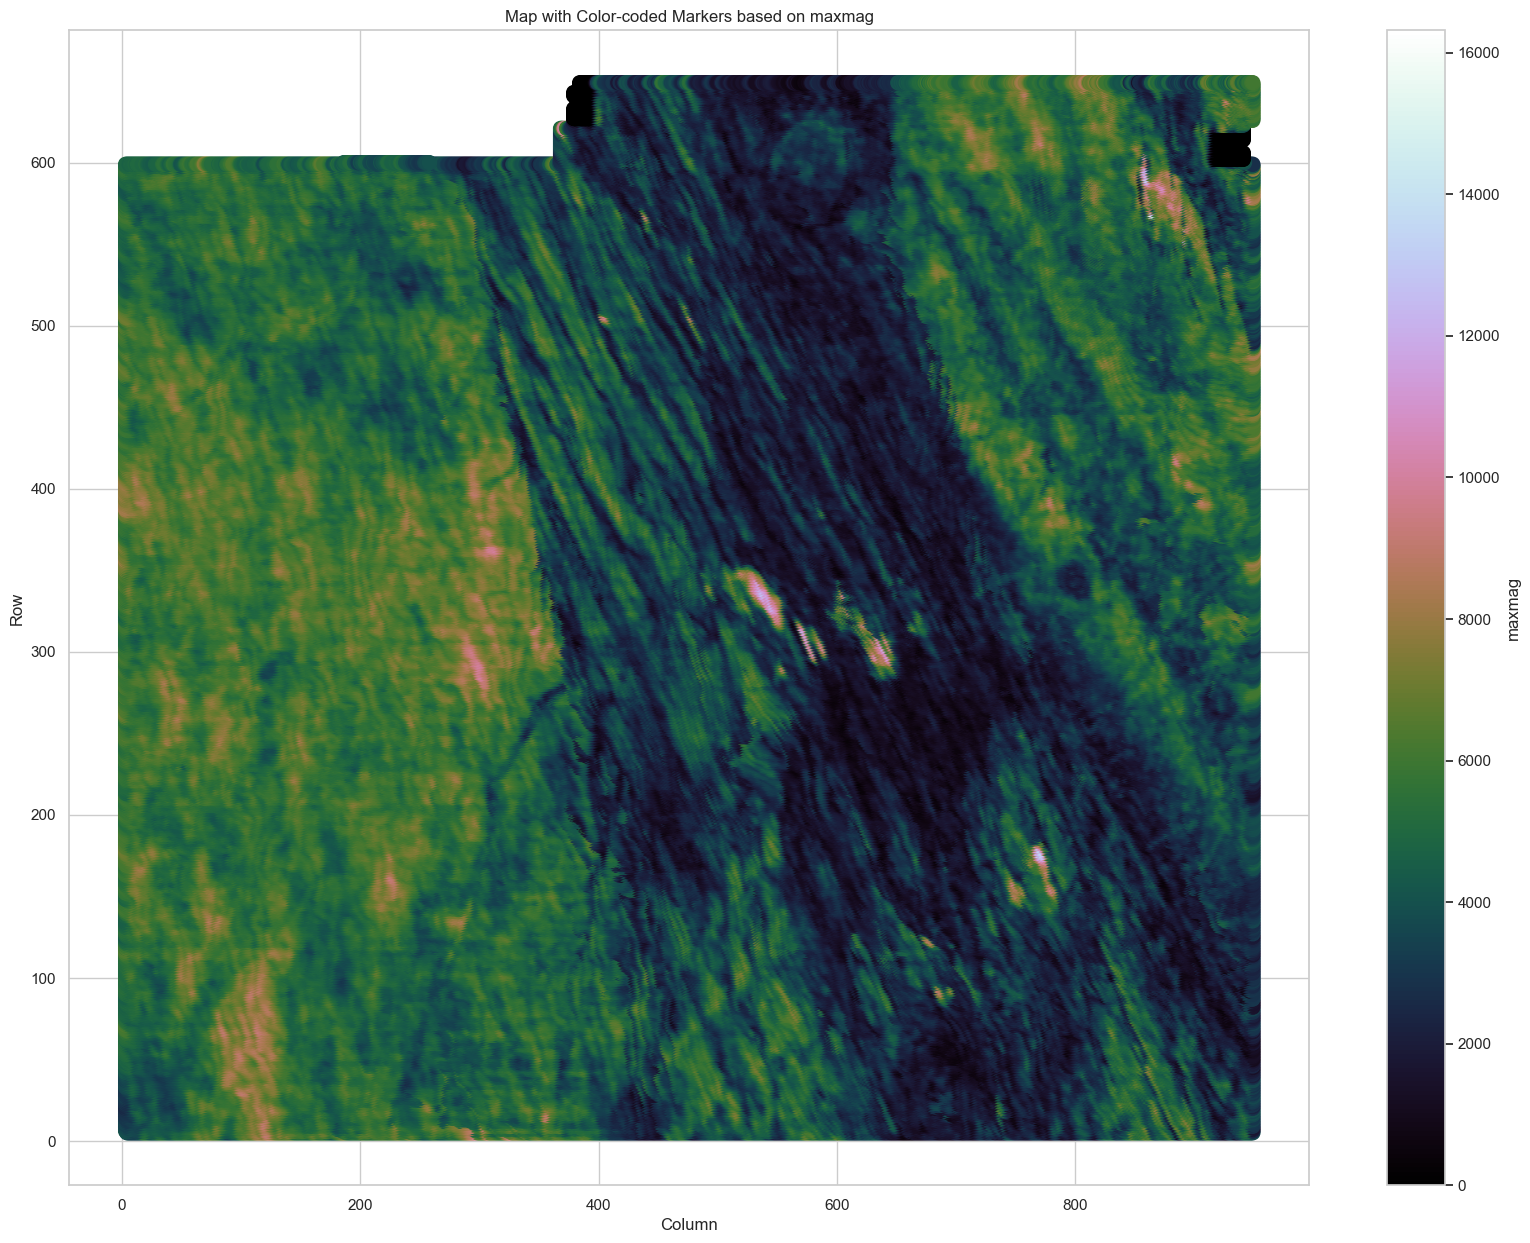

In [22]:
# Plot a scatter plot with color-coded markers based on 'maxmag'
plt.figure(figsize=(20, 15))
scatter = plt.scatter(df1['column'],
                      df1['row'],
                      c=merged_df['maxmag'],
                      cmap='cubehelix',
                      s=100,
                      marker='o',
                      alpha=1)

# Add colorbar for reference
cbar = plt.colorbar(scatter)
cbar.set_label('maxmag')

# Add labels and title
plt.xlabel('Column')
plt.ylabel('Row')
plt.title('Map with Color-coded Markers based on maxmag')

plt.show()

## Map of classes

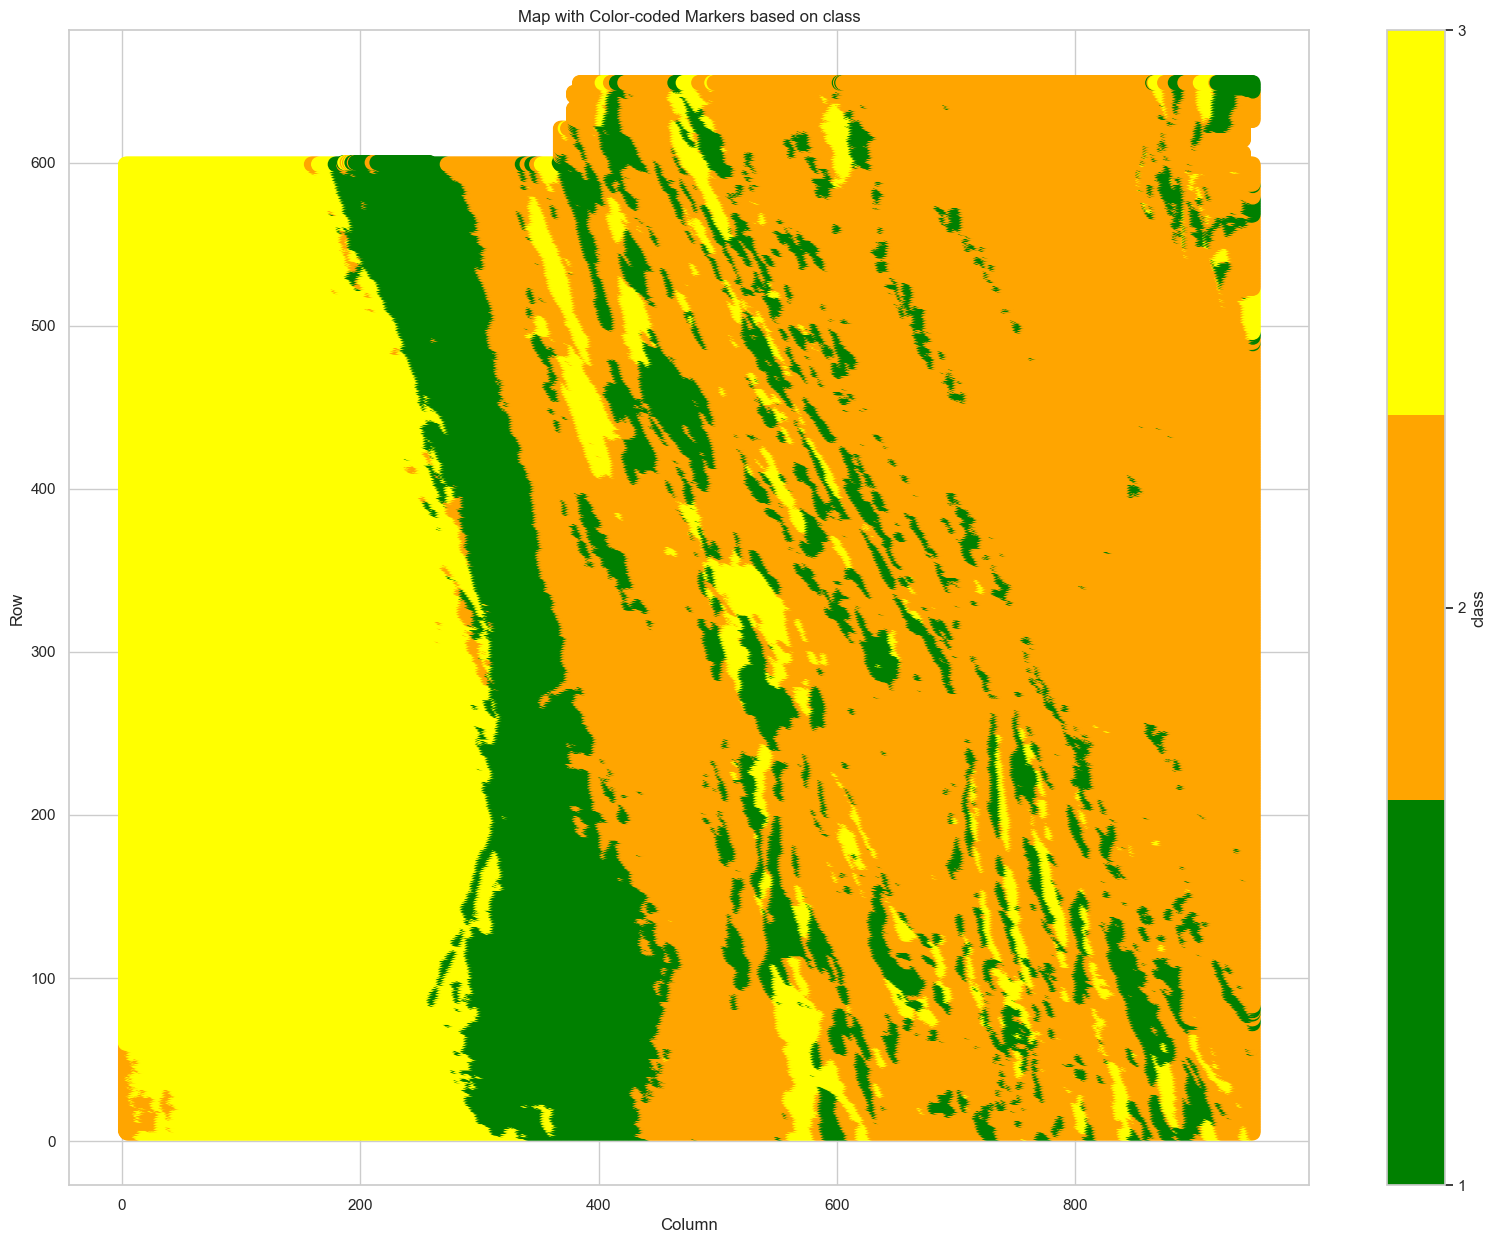

In [23]:
from matplotlib.colors import ListedColormap

# Assuming df1 is your DataFrame
# Assuming merged_df is your DataFrame that contains 'class' information

# Define intervals and corresponding colors
class_intervals = [1, 2, 3]  # Define your class intervals
colors = ['green', 'orange', 'yellow']  # Define colors for each interval

# Create a custom colormap
cmap_intervals = ListedColormap(colors)

# Plot a scatter plot with color-coded markers based on 'class'
plt.figure(figsize=(20, 15))
scatter = plt.scatter(df1['column'],
                      df1['row'],
                      c=merged_df['class'],
                      cmap=cmap_intervals,
                      s=100,
                      marker='o',
                      alpha=1)

# Add colorbar for reference
cbar = plt.colorbar(scatter)
cbar.set_ticks(class_intervals)
cbar.set_label('class')

# Add labels and title
plt.xlabel('Column')
plt.ylabel('Row')
plt.title('Map with Color-coded Markers based on class')

plt.show()


# Perform Kruskal-Wallis test

Before proceeding with a Kruskal-Wallis test, it's important to consider the following aspects and assumptions:

1. **Data Type:**
   - **Ordinal Data:** Kruskal-Wallis is suitable for ordinal data or continuous data that can be approximated as ordinal.

2. **Independence:**
   - **Independent Samples:** The samples being compared should be independent of each other. Each observation in one sample should be unrelated to the observations in other samples.

3. **Random Sampling:**
   - **Random Sampling:** The data should be collected through a random sampling process to ensure representativeness.

4. **Homogeneity of Variance:**
   - **Homogeneity of Variance:** Kruskal-Wallis is a non-parametric test and is not sensitive to differences in variance between groups. However, if the groups have substantially different variances, it may affect the interpretation of results.

5. **Mutual Exclusivity:**
   - **Mutual Exclusivity of Groups:** Each observation should belong to only one group. Groups should be mutually exclusive.

6. **Number of Groups:**
   - **Number of Groups:** Kruskal-Wallis is suitable for comparing three or more groups. For comparing two groups, a Mann-Whitney U test may be more appropriate.

7. **Sample Size:**
   - **Sample Size:** While Kruskal-Wallis is robust to unequal sample sizes, extremely imbalanced sizes can affect the power of the test.

8. **Ordinal or Continuous Data:**
   - **Continuous Data:** If the data is continuous and approximately normally distributed, an analysis of variance (ANOVA) may be more appropriate.

9. **Distribution Shape:**
   - **Distribution Shape:** Kruskal-Wallis is relatively robust to non-normality, but extremely skewed distributions may affect the results.

10. **Equal Shape of Distributions:**
    - **Equal Shape of Distributions:** Kruskal-Wallis assumes that the shape of the distributions in each group is similar.

11. **Interpretation of Results:**
    - **Practical Significance:** Consider the practical significance of the differences found, not just statistical significance.

12. **Post-Hoc Tests (Optional):**
    - **Post-Hoc Tests:** If the Kruskal-Wallis test indicates significant differences, you may want to perform post-hoc tests (e.g., Dunn's test) to identify specific group differences.

Always check the assumptions of the statistical test and, if necessary, consider alternative non-parametric tests or transformations of the data. Additionally, consulting with a statistician or data analysis expert can provide valuable insights into the appropriateness of the test for your specific data and research question.

In [24]:
# Group by the 'class' column
grouped_df = merged_df.groupby('class')

# Create separate DataFrames for each group using a loop
class_dfs = {}  # Dictionary to store DataFrames with class as key

for name, group in grouped_df:
    class_dfs[name] = group.copy()
    
# Access each DataFrame separately
class_df_1 = class_dfs[1.0]  # DataFrame for class 1.0
class_df_2 = class_dfs[2.0]  # DataFrame for class 2.0
class_df_3 = class_dfs[3.0]  # DataFrame for class 3.0

In [25]:
# Sample DataFrames
class_df_1 = pd.DataFrame({
    'maxmag': class_dfs[1.0]['maxmag'],
    'class': 'Class 1.0'
})
class_df_2 = pd.DataFrame({
    'maxmag': class_dfs[2.0]['maxmag'],
    'class': 'Class 2.0'
})
class_df_3 = pd.DataFrame({
    'maxmag': class_dfs[3.0]['maxmag'],
    'class': 'Class 3.0'
})

# Perform Kruskal-Wallis test
statistic, p_value = kruskal(class_df_1['maxmag'], class_df_2['maxmag'],
                             class_df_3['maxmag'])

# Print the results
print(f'Kruskal-Wallis Test Statistic: {statistic}')
print(f'P-value: {p_value:.10f}')

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print(
        'The differences between at least two groups are statistically significant.'
    )
else:
    print(
        'There is not enough evidence to conclude that there are significant differences between the groups.'
    )

Kruskal-Wallis Test Statistic: 195689.4373342139
P-value: 0.0000000000
The differences between at least two groups are statistically significant.
